# Using Deep Q-Networks with Reinforcement Learning to Play flappy birds
***

**CS445 - Introduction to Machine Learning**  
*Sooryaa Vignesh Thiruloga, CSU Id: 832549821*  
*Shweta Haran, CSU Id: 832655090*  
*Likhitha Chandra, CSU Id: 832609058*  
*Date: 05/12/2020*

The code for this project was an adaptation of [8] and can be found in the flappy birds folder along with this submission. 
steps to run the code  
1. cd flappy_birds
2. python deep_q_network.py

## Abstract
***
In this project, we apply a deep learning model to learn optimal control patterns from visual input using reinforcement learning. While this method is highly generalizable, we applied it to the problem of video game strategy, specifically for Flappy Birds. Given raw pixel values from the screen, Our agent uses a convolutional neural network to evaluate the Q-function for a variant of Q-learning (DQN), and we show that it is able to achieve super-human performance.

## Introduction
***
Flappy Bird is a single-player mobile game developed by Dong Nguyen released in 2013. The objective of the game is very simple, it is to help the bird 'Faby' navigate through the pipes. The bird keeps flying and all the player has to do is tap the screen. If this is done the bird flaps once and raises its height. If the player doesn't touch the screen then the bird descends gradually due to gravity. One point is awarded to the player for passing through a pipe successfully. The gaps between the pipes do not vary as the game proceeds. If the player reaches 10 points then a bronze medal is awarded, for 20 points and higher a silver medal, for 30 points and higher a gold and for 40 points or higher a platinum medal is awarded. The player loses if the bird hits the pipes or the ground. Otherwise, the game continues indefinitely.
The main objective of why we chose this particular topic was because this game is very addictive and simultaneously very hard to attain a high score. The game became popular because of its high difficulty level. So we wanted to see how we could implement what we learnt to play this game to reach a high score that we couldn't achieve. The motive was to see if we could successfully train and implement a model that can play this game indefinitely and also we wanted to implement a variety of methods to achieve the high score and see which works best and why it does. We wanted to achieve the optimized model and also learn about the various ways it can be implemented.

The difficult part is in training the model with just pixel information. So the model needs to learn from the raw pixels the features of the game like the bird, the pipes, etc. and needs to learn which is a right and wrong decision with information about the points and pixels alone. Reinforcement learning comes handy in times like these, where the agent, here the bird Faby, needs to make the right decision under uncertainty. These are fed with pixel information and the points scored as experience scenarios, from where it learns to make the right decisions and hence can train itself to react to rare scenarios by taking the right decisions, which will be difficult to input through programming.

The maximum we could score was 6 after several tries and was achieved with great difficulty. This shows how difficult the game can be. This either makes the player frustrated and give up on the game or gets the player hooked up to the game. We wanted to see how well we could train an RL model to achieve high scores that aren’t possible by an average human and see how efficient programs are than humans.


## Overview of Deep Learning in Games
***
In this section, we would like to describe about neural networks and machine learning algorithms in the context of games. The first subsection describes the common neural network architecture. The second subsection describes the three major categories of machine learning, which are supervised, unsupervised, and reinforcement learning. Approaches in these categories are usually based on gradient-descent optimization. We also discuss about few evolutionary approaches that combine several optimization techniques.

### A. Neural Network Models
*Artificial neural networks (ANNs)* can be defined as general-purpose functions that can be defined by their weights at each graph edge and their network structure. Based on their generality and ability to fit many continuous real-valued functions (provided they have enough parameters), they can and have been applied to various tasks, including the task of playing video games. The ANN architectures can be majorly divided into two divisions: *Recurrent neural network (RNN)* and *Feed-forward neural network*. *RNN* is usually applied to data that has time series. The output of an *RNN* depends on the outputs of previous time steps [2]. During the training of the *RNN*, a single input is fed to the network, in this case, a representation of the games state, which provides us with an output which can be the probabilities of values for each possible action. This output is again fed back into the network together with the next input, allowing the network more aware by memorizing the previous actions. This is highly useful as the single observation of the game does not represent the entire game state. In a *feed-forward network* it is very simple. The training process is similar to the *RNN* but doesn’t involve feeding the outputs back to the network. *Convolutional neural networks (CNN)* has trainable filters that can be used to process image data as pixels form a video game screen.     

In the coming sections, we will describe about different optimization methods that are commonly used to learn the playing behavior of the game with deep neural networks. Mostly optimization is used to search and find the best hyperparameters. These hyper-parameters can be network architecture, learning parameters.

### B. Neural Network Optimization
#### 1. Supervised Learning
In *supervised learning* the model learns from labels. During training, a model makes a decision and is compared with the ground truth for that set of inputs. This ground truth is called the label for the inputs. The difference between the ground truth and the decision made is called the error/loss. The loss is then backpropagated to update the weights of the model. The goal is to obtain a model that can generalize well on the training data. The common idea is a well-generalized model on the training data will be able to perform better on the new test data.

In games, this data can be a human playing the game while being recorded. This allows the agent to learn the mapping from the input and output state. This learning will be purely based on what action that humans performed for a given state. Another approach can be learning from another algorithm. If the game was already solved by that algorithm, then it can be used to generate the training data. This kind of training approach would be beneficial if the first algorithm was slow in producing results in real-time also the data may be missing key artifacts the agent might be missing. The agent is also crippled to learn only the strategies available in the training data and cannot new strategies. Therefore, for playing games it’s a common practice to combine additional training through reinforcement learning on top of the supervised learning based approach [3].

Another way supervised learning is used is to learn the transition states of the game. Hence, instead of predicting the action for a state, it predicts the next state. So the network is learning the model of the game [4]. 

#### 2. Unsupervised Learning
In *unsupervised learning* based methods, the objective is to discover patterns or similarities between data. They learn the distribution of features for a dataset and are used to cluster similar incoming data. They can also be used to compress data into their basic features (*Autoencoders*). Learning in an unsupervised fashion could be beneficial for games which have sparse rewards. 

A popular Unsupervised learning technique is *Autoencoders*. It is a neural network that tries to learn the identity function so that the output is identical to its inputs. The network consists of two parts: an encoder that maps the input *x* to a lower dimensional hidden vector *h*. The second part, Decoder, tries to construct the inputs using the lower dimensional vector *h*. By keeping the value of vector *h* small the network has to learn to compress data and therefore, learn a good representation. More overview about supervised and unsupervised learning can be found [5].

#### 3. Reinforcement Learning
 
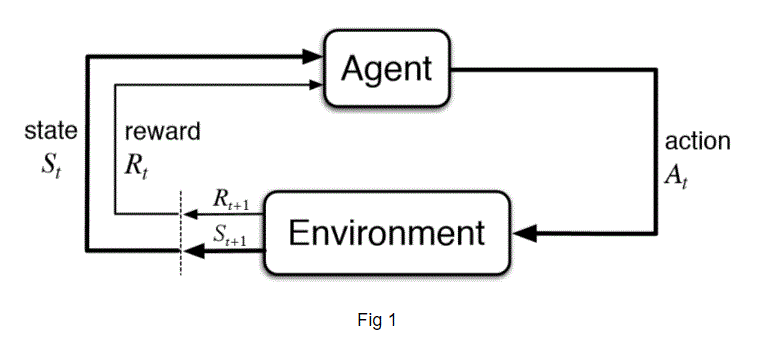

Reinforcement learning is a subdomain of machine learning whose tasks are different from traditional ways of learning. Instead of learning and making predictions from the data provided to it, the reinforcement algorithm learns, from scratch, from its surrounding environment. 

Reinforcement learning offers better solutions in many cases than supervised or unsupervised learning. Considering the flappy bird itself, we can collect data about moves made by the best player and make our algorithm learn the patterns followed by the successful players, this method is called a pattern recognition approach. So, whenever a situation previously faced by other players occurs, our algorithm replicates those players' strategies. But in the case of reinforcement learning, we don’t need any previous data about best player strategy, the algorithm starts learning from scratch. It learns from the failed attempts, without being affected by previous patterns followed by any players. For the pattern recognition approach, the game fails whenever a new situation occurs which is not previously dealt with by any player. Whereas in the case of reinforcement learning, the algorithm is trained to face any situation and also learn to come up with a strategic approach than following a fixed pattern. One important thing about reinforcement learning is that it can work on other environments as well.  Reinforcement algorithms learn via interaction and feedback from their actions and experiences, in other words getting the rewards for actions it takes in the environment. Primarily an agent is built to understand and interpret the environment in which the agent is placed. The agent takes action and interacts with the environment.


The common terminologies used in reinforcement learning are agent which is the learner and decision maker, the environment is the physical world where an agent learns and chooses what actions to perform, rewards the feedback given by the environment for each action chosen by the agent, policies are the control strategies or the functions of the agents which maps agent states or situations to actions, values are the future rewards that the agent would get by taking action in certain situation.

There are two different types of Reinforcement learning which are model-based reinforcement learning and model-free reinforcement learning.
In Model based Reinforcement learning, the system uses experience to construct a predictive model and check what happens when a particular action takes place. From here suitable actions are taken by searching and planning in this model. On the other hand, model-free reinforcement learning the modelling step is skipped and learns from states or policies or action values and can obtain the same best behaviour without any estimation or use of an intermediate predictive model. In general, the model-free reinforcement learning is less efficient than the model based reinforcement learning as in model-free the agent ‘’’depends on the trial and error observations to set up optimal policy’’’ and in the case of model based reinforcement learning, it tries to model the environment and then decides the best model based on the learning model[11].

**Model-Based RL**

Here the agent tries to understand the world or the environment and dynamically create a model to represent it. This doesn’t represent a policy directly, but uses the planning techniques like Model-Predictive Control to choose the actions. For every time an agent observes the environment, it comes up with an optimal plan with respect to the model.
The plan here is the description of all the actions to be taken over a fixed window of time[9].

**Model free reinforcement learning**  
Two of the approaches to represent the agent in this are Q learning and Policy optimization.  
**A. Policy optimization**  
In this, the methods policy is explicit as πፀ(a|s). The parameters are optimized by doing the gradient ascent on performance object J( πፀ) or indirectly, by maximizing the local approximations  J( πፀ). The optimizations are mostly performed on policy, which implies that the update only uses the data obtained while performing according to the latest version of the policy[9]. Some examples of policy optimization are A2C, PPO etc.  
**B. Q-Learning**  
In this, the methods learn an approximator for obtaining optimal action-value. Here the optimizations are mostly performed off-policy, which implies that the updates can use the data obtained at any time during the training, irrespective of how the agent selects to explore the environment when data is acquired. DQN is one of the Q- learning methods and one of the recently launched fields of Deep RL[9]. 




#### 4. Evolutionary approaches
The optimization techniques discussed until now depend mostly on the differentiation of the defined error. But, derivative free algorithms have also been used to train neural networks. This includes reinforcement learning. This approach can optimize neural network weights as well as their network architecture. Evolutionary approaches have been widely applied to video games because of their generality. Unlike gradient-descent based trained methods, evolutionary algorithms can be applied to both supervised and unsupervised learning. 

Traditionally, Evolutionary algorithms are applied to problems which have lower input dimensionality when compared to usual deep learning based approaches. In [6] authors showed that evolution strategies that depend on parameter exploration through stochastic noise instead of calculating gradients, can achieve results that are competitive to recent deep RL approaches for Atari video game playing, provided they are equipped with enough computational resources.


## Methods
***  
The current state of the agent is the direct result of the previous state of the agent and the selected action. The preceding state is also the result of its previous state, this continues till the previous state is the initial state. The information about the current states are stored and these help in choosing the next action. Processing and saving the steps of the agent will be a problem as the number of steps increases. There might be a point where it is not possible to do any further calculations. 

In order to handle this problem, we assume that all the states are Markov States; which means the current state of the agent depends only on the previous state and transition from the previous state to the present state. Using Markov’s assumption means we are losing information which might not be best for games like Chess as the order of moves of the player may give the game strategy or thought process of the opponent player.

**Bellman Equation**

When we have the information about the expected rewards for each action taken on each step, we will choose the order of actions which will result in the highest rewards[10]. This combined reward we receive is called Q value or Quality value. An equation is given which formulates the above strategy equation 1
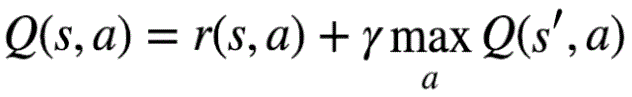

Here, s is the current state and a is action selected, r(s, a) is the reward received immediately and these are all added up with a maximum Q value possible from the state s’ and selecting the action that will give the highest Q. 𝛾 is the discount factor which will manage the importance of immediate reward versus the long term rewards.

The Bellman equation is  very useful and powerful because of the following characteristics

Retaining the Markov’s assumptions, the Bellman equation’s recursive nature allows backpropagation of future rewards to past states.
Q values can be assumed anything in the start, as it is recursive it will converge to original or real values.

We create a table with all the possible actions at each state and use it to store the Q values.
When the succeeding state s’  is terminal state the Bellman equation becomes

                                                Q(s,a)=r(s,a)
The problem with this Bellman equation is we keep on choosing the best action and no new things are tried and we might miss out the highest rewarding approach because we never tried it. This problem can be solved by introducing the ε-greedy approach, in which we can choose a random action with probability ε and by doing this we are giving the agent an opportunity to try new prospects. 

Scaling these tables is hard for a real world environment or game as the number of states in these are really high. Instead, we use neural networks to act as function approximators and take all the possible states as vectors and make algorithms to learn to map those vectors to Q-values.

In this section we will be discussing how the model is parameterized and explain the algorithm. 

**A. MDP formulation** 

The actions that agent can take in a flappy bird game are to flap(a=1) or to let the bird fall by doing nothing(a=0). The state here is denoted by a sequence or  pattern of frames from the flappy bird games and the actions recently taken. 

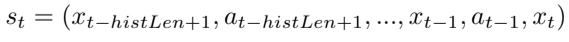
     
In the equations shown above, $s_t$ which is the state at particular time $t$ , $x_t$ being the frame at the time t, $a_t$  being the action taken at time t. Number of recent frames to be kept track of are monitored by hyper parameter hisLen. The hyper parameter will help in reducing the state and storage space as keeping track of less number of frames requires less storage than keeping the total number of frames from the starting. One of the reasons we need multiple a’s and x’s instead of single frame x is because temporal information is required for the agent to play. One such parameter which needs them is velocity which can’t be obtained from an agent from a single frame.   
The value of 𝛾(the discount factor) is 0.95. We try to estimate optimal Q function as we do not estimate the rewards and probabilities as Q learning is model-free. The rewards in the case of flappy birds is the score of the game.  

The score is increased by 1 every time the bird crosses a pipe starting from 0. The problem with these rewards is that the reward will be the same when the bird dies immediately after a pipe or just before the pipe. Even though the agent would realize this eventually, it is better to add a reward called rewardsAlive as that would speed up the training process. Now we have 3 rewards rewardAlive for every single frame the bird stays alive , rewardPipe for every pipe it crosses and rewardsDead for losing or dying.

**B. Q learning**

The principle of reinforcement learning is to always get the highest possible rewards. Bellman equation eq.1 is used to update Q.

Q learning is not efficient.In order to allow the generalization to unseen states, new function approximations are used on the Q function. In our project we used a Deep Q-Networks(DQN) approach where a neural network is used to approximate the Q-function.  
The usual loss function used for the training the Q-learnings Q function approximator is
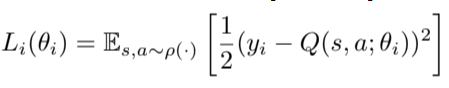
Here $ፀ_i$ represents the Q-network parameters, $y_i$ represents the target.
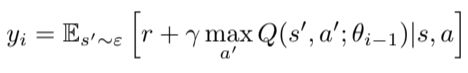
Target $y_i$  is defined for a particular experience (s,a,r,s’) .

To update our weights of the network we will be using ADAM optimizer and backpropagation on the above given loss function.
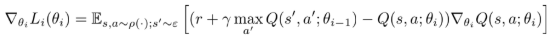
We will also be using the e-greedy approach. In the process of implementing , we try different ∈ values from 0 to 1. This helps agent in exploring best actions for different states.

**C.Experience replay**

In traditional Q-learning, the experiences from the successive frames are all correlated. This correlation of experiences can lead to inefficient training and may hamper the training process. In order to tackle this problem we use experience replay to de-correlate these experiences from the consecutive frames. At every frame we store an experience into the replay memory in experience replay. The replay memory has recent experiences and the number of experiences depends on the size of the replay memory. The experience replay is timely updated in order to keep up with recent actions with the Q function. The batch which is used to update the Deep Q-Network are obtained by uniformly sampling the experiences taken from replay memory.

**D.Stability**  

A target network $\hat{Q}$(s, a) is used to essentially get more stability in reducing the loss function in DQN. The target network $\hat{Q}$(s, a) is almost the same as the Q(s,a) and they even have same networks structures, just the parameters might be different. The target network $\hat{Q}$(s, a) is updated for every C times the Q(s,a) is updated. This target network $\hat{Q}$(s, a)  is used for computing the target $y_i$ based on the following equation.
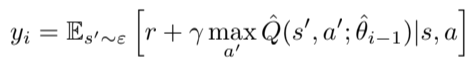
This will lead to increase in stability while updating Deep Q-Network.

**E.Pre-Processing**  

We have to do pre-processing in order to reduce the dimensionality and the state space, we need this because we have very high dimensional states. We need pixels to do the pre-processing, that is why we take or extract images from $s_t$. We convert the image to grayscale and the original screen 512 x 288 pixels is trimmed into 340 x 288 and also downsample the image by a factor of 0.3 and the resulting image is of size 102 x 86 pixel. This picture is then rescaled again to get 84 x 84 and this pixel image is normalized in order to convert it from [0,255] to [0,1]. This is addressed as feature extractor $ø$(s).


### Deep Q-Network  
They are a combination of deep learning and Q learning. DQNs are basically a convolutional neural network, which is trained using a variant of the Q-learning. They are far more superior because their inputs are high dimensional sensory inputs, in our case the raw pixels image of the game and their points details. These raw pixel data are fed to a convolutional neural network which gives us an output vector with the Q value of every action. This is then fed to our exploration probability, epsilon, which chooses the action with the highest Q value. Their working is explained in general below:
    (i)   Storage and collection of the samples in a replay buffer with the current states.
    (ii)  Uniformly sample batches of experiences from this buffer, which is also known as experience repay.
    (iii) Use these sampled experiences to update the Q network.
These steps are repeated until the state is expired.

Now a detailed Q learning algorithm based on the general theory explained above is implemented specific to playing the flappy bird game:
 
**Deep Q-learning algorithm**  
The algorithm for how the model gets trained can be explained as follows:
 
> Initialize replay memory $D$ to size $N$  
Initialize action-value function $Q$ with random weights  
for $episode$ = 1, $M$ do  
$\;\;\;$Initialize state $s_1$  
$\;\;\;$for $t$ = 1, $T$ do  
$\;\;\;\;\;\;$With probability $ϵ$ select random action $a_t$  
$\;\;\;\;\;\;$otherwise select $a_t$=$max_a$  $Q$($s_t$,a; $θ_i$)  
$\;\;\;\;\;\;$Execute action $a_t$ in emulator and observe $r_t$ and $s_{t+1}$  
$\;\;\;\;\;\;$Store transition ($s_t$,$a_t$,$r_t$,$s_{t+1}$) in $D$  
$\;\;\;\;\;\;$Sample a minibatch of transitions ($s_j$,$a_j$,$r_j$,$s_{j+1}$) from $D$  
$\;\;\;\;\;\;$Set $y_j$:=  
$\;\;\;\;\;\;\;\;\;$$r_j$ for terminal $s_{j+1}$  
$\;\;\;\;\;\;\;\;\;$$r_j$+ ($γ$ x $max_{a'}$)  $Q$($s_{j+1}$,a'; $θ_i$) for non-terminal $s_{j+1}$  
$\;\;\;\;\;\;$Perform a gradient step on ($y_j$ - $Q$($s_j$, $a_j$ ; $θ_i$))$^2$ with respect to $θ$  
$\;\;\;$end for  
end for  

So the algorithm shows how we use Q-learning and experience replay to train the model. From the algorithm we can see that we store every experience, that is the game that is played by the model, in the replay memory. The deep Q-network is updated using a batch of uniformly sampled experiences. This is similar to sampling batches from a dataset using SGD or mini-batch gradient descent in convolutional neural networks for deep learning. The exploration probability and the target network Q’(s, a) are also updates accordingly.

First, we initialize the replay memory and the DQN with random weights. A new game or episode is started by initializing the state to $s_0$. We then extract the information $x_t$ from the raw pixel input we give the model and update the state st with this. We then add the experience, $e_t$, to the replay memory. The best action is taken by the model from previous experiences, and this is added to the training model. The uniformly sampled batch of experience from the replay memory is then used to update the DQN through back propagation and the exploration probability is also updated. The target network is updated only if C is updated to the DQN. The state $s_t$ is then updated with $a_t$ and then the rewards are updated accordingly. Now the positions of the bird, the pipes, and other game parameters are updated and the screen is refreshed. This cycle is continued until the bird crashes. After that, the game is restarted with a new episode and the cycle continues. The game is restarted and played to train the model until the number of iterations specified is achieved.

### Network Architecture

We have defined how the Q-learning will be executed. Now we have to implement this as a neural network. So we should feed the neural network with 4 states, that is the previous 4 greyscale frames instead of just the present state i.e. a single state because this will help the network determine the motion and velocity of the bird better.

The CNN takes an input of 84 x 84 x HistoryLength image. The first layer has 32 filters with a size of 8 x 8 with a stride of 4 followed by a rectified nonlinearity. The second convolutional layer has 64 filters of size 4 x 4and a stride of 2 followed by a rectified linear unit. The third convolutional layer has 64 filters of size 3 x 3 with stride 1 followed by a rectified linear unit This is followed by two fully connected layers, the first with 512 outputs and the second fully connected layer which is also the final output layer has a single output for every action. The overview of the architecture is shown in the below table.
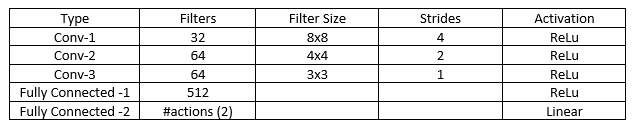

The neural network will work on the concept of experience replay and the target network as explained before. The Target network helps stabilize the network. When the network is updated for every experience, the output q-values are also updated. This can destabilize the network, so to overcome this issue we use another network called the target network for calculating the target rewards and we update the target network only after a fixed number of steps. This prevents the q values in the network from updating frequently and thus helps in stabilizing the network.

So we need to initialize both the networks in the start, the main neural network that uses an ADAM optimizer, and the target network that is used to calculate the rewards and helps to stabilize the main network. The target network should be equalized to the main neural network after a fixed number of iterations. Also, a history buffer should be defined which will store the experiences that are state, action, and reward of the previous 20000 steps.

Before feeding the network with the images we have to pre-process them. Since the images are high-dimensional RGB input they are processed to get a greyscale image of 80 x 80 scale, to reduce the computation for training. This is shown in figure 2 below.

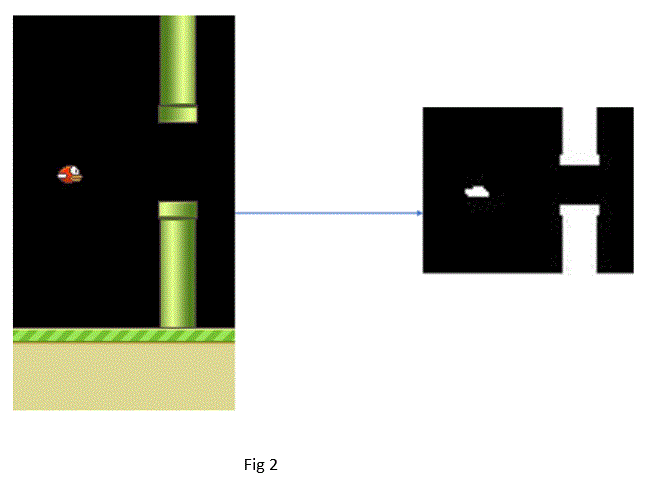

After this, the exploration phase starts where for the first 10000 steps of the game for the initial training we shall let the network take random action instead of taking the action with the highest probability.

After this, the actual training of the network started. The past experiences are uniformly sampled and random batches of these are selected and used to calculate the target rewards for the state-action-reward tuple. This is fed into the model which we have defined in the algorithm above.

### DIVISION OF WORK
We divided the work among us so that all of us could learn in the process of doing our project and no one person would feel the burden of doing the whole project. All of us studied about Q-table and Q-learning in detail and how they can be implemented to train a neural network to play games. We then agreed that deep Q-learning would be the better option for us to train the network to play the flappy bird game since it can train the model better than a simple Q-learning algorithm and also to implement a Q-table would not be advisable since our states are too many and it will be hard to maintain such a big table. We then tried to find papers on how other people have implemented this in a similar fashion. We found one interesting paper and tried to implement our model the same way [7]. Likhitha and Shweta were then responsible for setting up the game environment and pre-processing of the data. Sooryaa was responsible for training the model. During the week before the finals we all tested the model and worked on getting better results with the model we had implemented. We also split up the report into sections and wrote the report during this time.



## Results
***
The final output video of our agent the flay bird playing the game can be found in this [link](https://drive.google.com/open?id=17UymqE3T2yf2GECeCUmswRIFsmyUQTs4). We had set our parameters according to [7] and obtained similar results. We also evaluate the performance achieved by the agent by calculating the game score, i.e. the how many pipes the agent has passed. The scores provided in the table are the average score for 10 games. 

### A. Testing parameters
The game was executed using the following parameters. the game was run at 30 frames per second the history length is 5 and the discount factor was 0.95. The reward values are as follows rewardAlive value is 0.1, rewardPipe value is +1.0 and rewardDead value is -1.0. The epsilon value (for exploration probability) is decreased from 0.1 to 0.0001 over a period of 600000 updates to DQN. We used these values because we observed that with high epsilon values the agent was mostly in the top of the screen and hits the pipe. Replay memory size was 2000 experiences. 

We used Adam optimizer with MSE loss during training, with a learning rate of 0.000001. All these parameters were found out using the trial and error method. For example, with too high learning rate the neural network weights were exploding and with low learning rates, it took a long time to train. The training was started only when the replay memory has a minimum of 3000 experiences and updates the target network once for every 1000 updates to the DQN. The weights in the Convolution layers are initialized to have a normal distribution with a standard deviation of 0.01. The whole code was implemented using TensorFlow.

### B. Overall Performance
The trained DQN performs better than humans. The performance of our implementation is compared with a baseline and humans. 
baseline implementation flaps every *z* frames to keep the agent /bird in the middle of the frame and in the baseline, the gap between each pipe is uniformly distributed with the expected location of the bird to be in the middle of the screen. Table 1 shows the average score of DQN on different levels of hardships and compared with the baseline and human.
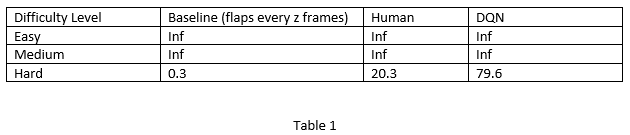
Table 2 depicts the highest score of DQN on different levels of difficulties and compared with the baseline and human.
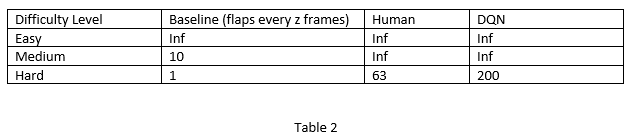
Form the above two tables we can observe that the performance of our method (DQN) is higher than the counterparts. we have put " inf " in the table where the score exceeds 1000. For the case of humans, if the score exceeds 100, we have put " inf " in the table. We have also assumed that the human will play the game continuously without doing other activities like eating and sleeping. Hence, considering that assumption we have put " inf " for humans for the easy as well as medium difficulty case which might not be the case. 

In general, we observed that all the failures that happened with the hard difficulty setting were because the agent went upwards in places where it should drop and hits the pipe and dies. Sometimes, the agent just touches the edge of the pipe while falling and dies. the agent when trained more takes greedier moves. This can be resolved by making the agent to make moves with low-risk factor. this can be achieved by making the agent take a random move with a small probability. 

### C. Training Time
In his section, we would like to discuss the number of iterations it would take to achieve better performance for the flappy bird agent. As there is no definition of the epoch as such in this scenario the number of updates to the DQN is the number of iterations. Intuitively with more training, the agent must perform better. But, our results from table 3 shows that more training need not necessarily be profitable.
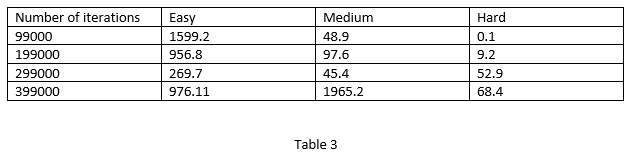
It can be seen that the scores are fluctuating after some amount of training. This breakpoint was not achieved for the hard difficulty as we can see that by increasing the number of iterations the scores are also increasing. One option can be to decrease the learning rate as more training happens or we could also increase the model complexity by changing the network architecture.

### D. Initialized with Pretrained Network
In this section, we discuss about the results obtained when the network was initialized to another pre-trained network. That means, we have used the same parameters that we had used to train the DQN in the easy difficulty level, for medium difficulty level also. the network on the medium difficulty level was trained for 209,000 iterations with the same parameters of the previously trained DQN on easy mode. 

From below table 4, we can observe that the network can perform better in the setting it is trained at. It remembers how to perform better in the easy mode and just makes modifications to the weights according to the medium difficulty level and performs better. 
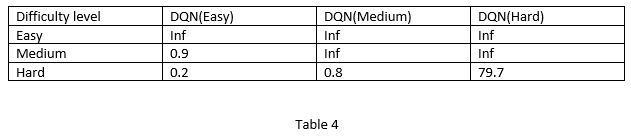
But when we train the DQN in different difficulty levels and initialize with random weights, the performance is very poor and can be observed from table 5 below. The training was done for 200 iterations for each difficulty level and we can observe that these networks do not generalize well to different difficulties. 
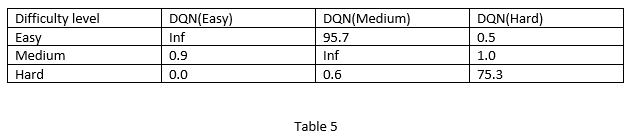

### E. Consequences of rewardAlive
We had also conducted experiments to see whether giving a reward for staying alive truly provides us with better results. It can be seen from table 5 that by giving rewards for staying alive the performance is very high. Probably the rewardAlive reward accelerates the training process as the reward is directly correlated to the score or goal. Therefore, we concluded that by adding a reward which is correlated to the goal of the game increases the performance.
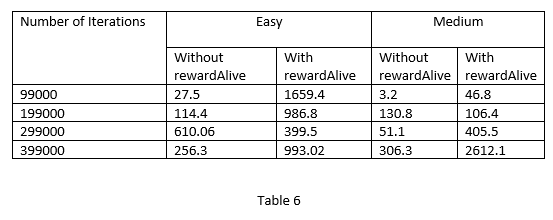


## Conclusions
***
We were able to successfully trained and realised the output of the model based on the works in [7,8] and played the flappy bird game. We learned in detail about Q-learning especially about the different algorithms implemented to play games. Most of our time was consumed in training the model so that it is as efficient as possible. The training of the model took nearly 13 hours. If we had implemented a simple Q-learning algorithm the time taken to train the model would have been even larger. Training the data for a larger iteration did not necessarily end up in a higher score. This could mean that certain experiences have a greater influence on making decisions, so if we could find out how the model is determining which experience is important then we could prioritize them so that the model is trained better and the efficiency is higher so that we could achieve a higher score. Epsilon greedy Q-learning also helps in training the model more efficiently. We have removed the background effects while pre-processing the data for the network, so we can probably experiment with this model to see how the network will be trained if the background information is also added. If the score increases then maybe this is an important parameter otherwise we can ignore the background effects if the score does not increase or if the score decreases. 

### References

[1] [Goodfellow, et al., 2016] Ian Goodfellow and Yoshua Bengio and Aaron Courville, [Deep Learning](http://www.deeplearningbook.org), MIT Press. 2014.

[2] R. J. Williams and D. Zipser. A learning algorithm for continually
running fully recurrent neural networks. Neural computation, 1(2):270–
280, 1989.

[3] D. Silver, A. Huang, C. J. Maddison, A. Guez, L. Sifre, G. Van
Den Driessche, J. Schrittwieser, I. Antonoglou, V. Panneershelvam,
M. Lanctot, et al. Mastering the game of go with deep neural networks
and tree search. Nature, 529(7587):484–489, 2016.

[4] D. Ha and J. Schmidhuber. World models. arXiv preprint
arXiv:1803.10122, 2018.

[5] J. Schmidhuber. Deep learning in neural networks: An overview.
Neural networks, 61:85–117, 2015.

[6] T. Salimans, J. Ho, X. Chen, and I. Sutskever. Evolution strategies
as a scalable alternative to reinforcement learning. arXiv preprint
arXiv:1703.03864, 2017.

[7] Kevin Chen, "Deep Reinforcement Learning for Flappy Bird".

[8] GitHub repository: https://github.com/yenchenlin/DeepLearningFlappyBird

[9] https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html

[10] https://towardsdatascience.com/qrash-course-deep-q-networks-from-the-ground-up-1bbda41d3677

[11] https://medium.com/@SmartLabAI/reinforcement-learning-algorithms-an-intuitive-overview-904e2dff5bbc

[12] https://hardikbansal.github.io/FlappyDQNBlog/

[13] https://medium.com/@videshsuman/using-reinforcement-learning-techniques-to-build-an-ai-bot-for-the-game-flappy-bird-30e0fd22f990


In [3]:
import io
from nbformat import current
import glob
nbfile = glob.glob('Project Report.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Project Report.ipynb is 6205
